In [7]:
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
import os
import pandas as pd
import re

In [2]:
# Load outputed info_dict
def valHist_HiddenGap(directory,title='Validation Loss History',save=False,legend_out = False):
    files_list = os.listdir(directory)
    for filename in files_list:
        nhid = int(filename.split('_')[3])
        filepath = directory+filename
        with open(filepath,'rb') as f:
            info_dict = pickle.load(f)
            val_loss_hist = np.exp(info_dict['val_losses'])
            test_loss = np.exp(info_dict['test_losses'][0])
            if nhid ==100:
                plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss),ls='--')
            else:
                plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss))
    plt.xlabel('Epochs')
    plt.ylabel('Exp(Validation Loss)')
    #plt.xlim([0,30])
    #plt.ylim([120,180])
    plt.legend(loc='best')
    if legend_out:
        pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
    plt.title(title)
    if save:
        plt.savefig('%s.png'%(title))
    plt.show()
    return 

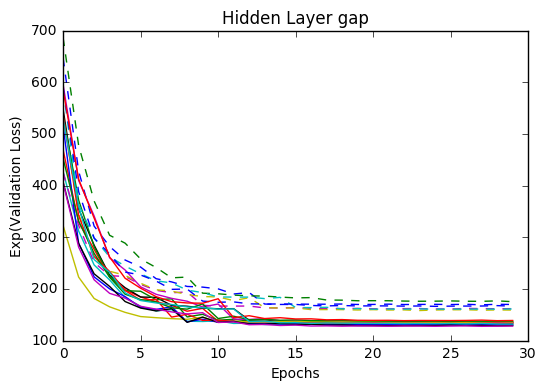

In [7]:
valHist('info_dict/','Hidden Layer gap')

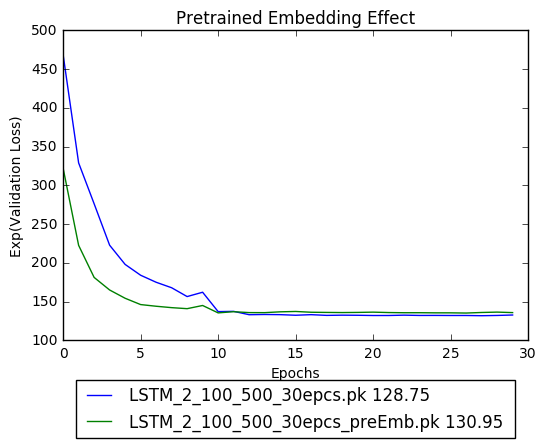

In [92]:
valHist('comparisons/','Pretrained Embedding Effect')

# Parameter Tunning: Dropout

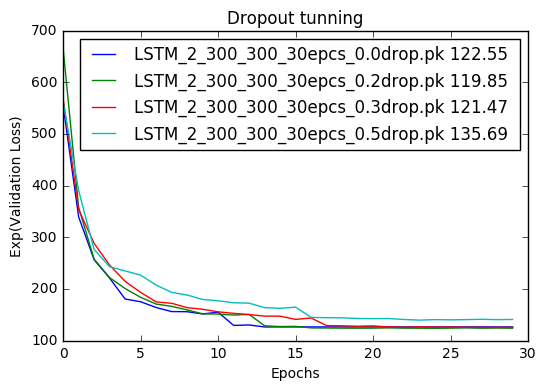

In [11]:
valHist('../../datasets/Dropout_tunning/','Dropout tunning',save=True)

In [51]:
# Load outputed info_dict
def valHist(directory,title='Validation Loss History',save=False,legend_out = False):
    files_list = os.listdir(directory)
    plt.figure(figsize=(20,10))
    for filename in files_list:
        filepath = directory+filename
#         with open(filepath,'rb') as f:
#             info_dict = pickle.load(f)
        ####Solve decoding issue relate to python 3.5
        f = open(filepath,'rb')
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        info_dict = u.load()
        #################
        val_loss_hist = np.exp(info_dict['val_losses'])
        test_loss = np.exp(info_dict['test_losses'][0])
        if vars(info_dict['args'])['tied']:
            plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss))
        else:
            plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss),ls='--')
    plt.xlabel('Epochs')
    plt.ylabel('Exp(Validation Loss)')
    #plt.xlim([0,30])
    #plt.ylim([120,180])
    plt.legend(loc='best')
    if legend_out:
        pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
    plt.title(title)
    if save:
        plt.savefig('%s.png'%(title))
    plt.show()
    return 

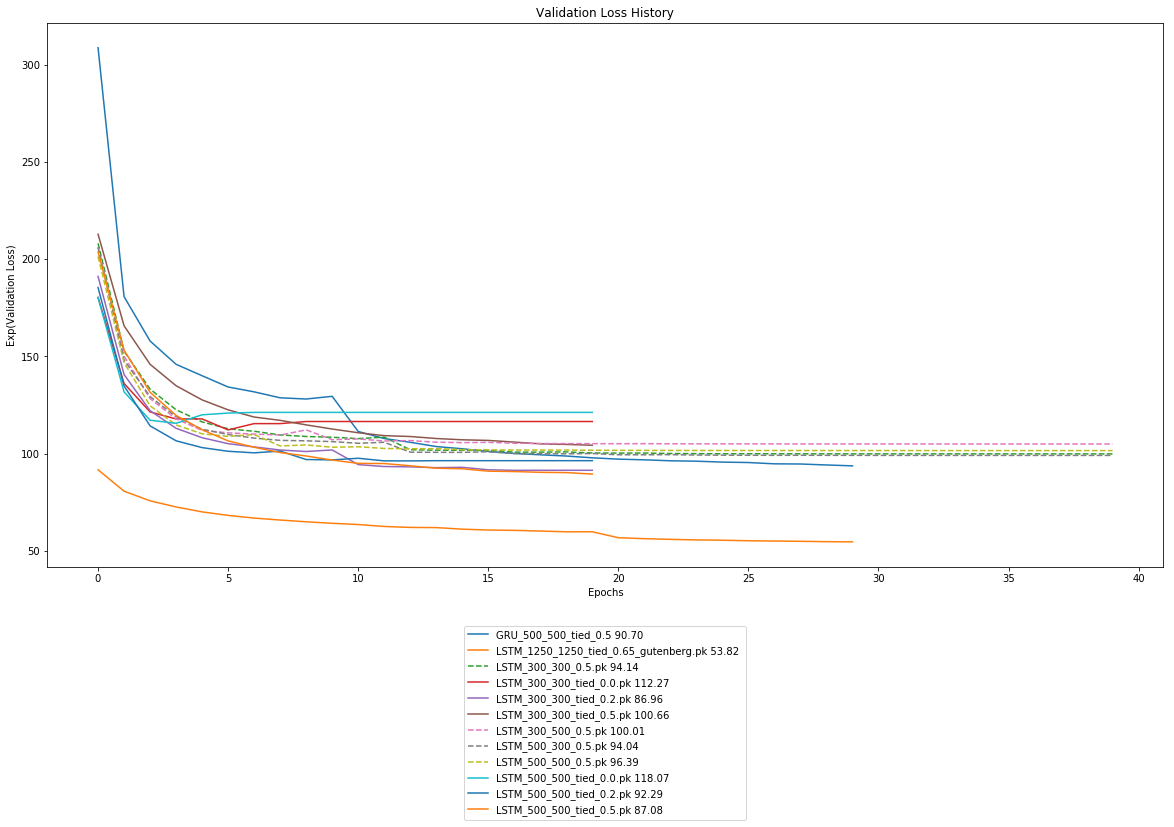

In [52]:
valHist('../../datasets/info_dict/',save=False,legend_out=True)

In [17]:
def grid_result(directory):
    files_list = os.listdir(directory,)
    parameters = ['data','model','emsize','nhid','tied','pdropout','epochs']
    results = pd.DataFrame(columns=parameters)
    test_ppl = []
    for filename in files_list:
        if filename[0]=='.':
            continue
        filepath = directory+filename
        row = []
        ####Solve decoding issue relate to python 3.5
        f = open(filepath,'rb')
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        info_dict = u.load()
        #################
#         with open(filepath,'rb') as f:
#             info_dict = pickle.load(f)
        args = vars(info_dict['args'])
        test_ppl.append(np.exp(info_dict['test_losses'][0]))
        for parameter in parameters:
            row.append(args[parameter])
        row=pd.DataFrame([row],columns=parameters)
        results=results.append(row)
    results['ppl_test'] = test_ppl
    results = results.sort_values(by='ppl_test')
    results.index = np.arange(len(results.index))
    return results
            

In [18]:
files_list = os.listdir('../../datasets/info_dict/')


In [100]:
grid = grid_result('../../datasets/info_dict/')

In [101]:
grid = grid.sort_values(by=['emsize','nhid','tied'],ascending=True)b

In [107]:
print(grid.loc[[0,1]].to_latex(index=False))

\begin{tabular}{llrrlrrr}
\toprule
                        data & model &  emsize &    nhid &  tied &  pdropout &  epochs &   ppl\_test \\
\midrule
 ./data/gutenberg\_processed/ &  LSTM &  1250.0 &  1250.0 &  True &      0.65 &    30.0 &  53.819555 \\
                 ./data/penn &  LSTM &  1250.0 &  1250.0 &  True &      0.65 &    30.0 &  73.478093 \\
\bottomrule
\end{tabular}



In [102]:
print(grid[grid.tied==True].drop(['data'],1).to_latex(index=False))

\begin{tabular}{lrrlrrr}
\toprule
model &  emsize &    nhid &  tied &  pdropout &  epochs &    ppl\_test \\
\midrule
 LSTM &   300.0 &   300.0 &  True &      0.20 &    20.0 &   86.962860 \\
 LSTM &   300.0 &   300.0 &  True &      0.50 &    20.0 &  100.663884 \\
 LSTM &   300.0 &   300.0 &  True &      0.00 &    20.0 &  112.271540 \\
 LSTM &   500.0 &   500.0 &  True &      0.50 &    20.0 &   87.076139 \\
  GRU &   500.0 &   500.0 &  True &      0.50 &    30.0 &   90.698642 \\
 LSTM &   500.0 &   500.0 &  True &      0.20 &    20.0 &   92.286470 \\
 LSTM &   500.0 &   500.0 &  True &      0.00 &    20.0 &  118.071382 \\
 LSTM &  1250.0 &  1250.0 &  True &      0.65 &    30.0 &   53.819555 \\
 LSTM &  1250.0 &  1250.0 &  True &      0.65 &    30.0 &   73.478093 \\
\bottomrule
\end{tabular}



In [58]:
print(grid.iloc[1:].drop('data',1).to_latex())

\begin{tabular}{llrrlrrr}
\toprule
{} & model &  emsize &   nhid &   tied &  pdropout &  epochs &    ppl\_test \\
\midrule
1  &  LSTM &   300.0 &  300.0 &   True &       0.2 &    20.0 &   86.962860 \\
2  &  LSTM &   500.0 &  500.0 &   True &       0.5 &    20.0 &   87.076139 \\
3  &   GRU &   500.0 &  500.0 &   True &       0.5 &    30.0 &   90.698642 \\
4  &  LSTM &   500.0 &  500.0 &   True &       0.2 &    20.0 &   92.286470 \\
5  &  LSTM &   500.0 &  300.0 &  False &       0.2 &    40.0 &   94.041659 \\
6  &  LSTM &   300.0 &  300.0 &  False &       0.2 &    40.0 &   94.144126 \\
7  &  LSTM &   500.0 &  500.0 &  False &       0.2 &    40.0 &   96.386646 \\
8  &  LSTM &   300.0 &  500.0 &  False &       0.2 &    40.0 &  100.010238 \\
9  &  LSTM &   300.0 &  300.0 &   True &       0.5 &    20.0 &  100.663884 \\
10 &  LSTM &   300.0 &  300.0 &   True &       0.0 &    20.0 &  112.271540 \\
11 &  LSTM &   500.0 &  500.0 &   True &       0.0 &    20.0 &  118.071382 \\
\bottomrule
\end{ta